In [1]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).resolve().parent))
from functions import  load_decoding_results, selective_channels, visual_pid_eid_pairs, aggregate_TFs, plot_time_frequency_diff
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
visual_pid_eid_pair = visual_pid_eid_pairs( only_passive= True)
results = load_decoding_results(visual_pid_eid_pair, 'visual_mua_TrainPassiveTestActive' , dir = '/mnt/data/AdaptiveControl/mohammad/crnl/ibl_oscillations/_analyses/Decoding_spikes/results/rightVsLeft' )
right_selective, left_selective, right_sensitive, left_sensitive, neutral = selective_channels(results)
print('right selective:', len(right_selective))
print('left selective:', len(left_selective))

visuals = ['VISp', 'VISpm', 'VISam', 'VISa', 'VISrl', 'VISal', 'VISli', 'VISl']
RS_ch = right_selective['acronyms']
LS_ch = left_selective['acronyms']

data = []
for region in visuals:
    RS_count = len([ch for ch in RS_ch if re.match(rf'^{region}[12456]', ch)])
    LS_count = len([ch for ch in LS_ch if re.match(rf'^{region}[12456]', ch)])
    data.append([region, RS_count, LS_count])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Region', 'Right Selective', 'Left Selective'])
print(df)


Total number of probe insertions: 205
Number of sessions without passive data: 76
Number of sessions with passive data: 129
Number of missing pids: 11
 number of total channnels 3948
right selective: 58
left selective: 59
  Region  Right Selective  Left Selective
0   VISp               14              19
1  VISpm                8               7
2  VISam                7               9
3   VISa               21              18
4  VISrl                2               1
5  VISal                1               3
6  VISli                3               1
7   VISl                2               1


# VISa

# 1) TFR left 80  - left 20 blocks during anticiaption of the target in left selective electrodes

total left selective electrodes for condition BiasRight_BiasLeft_anticip is 18
Processing region: VISa


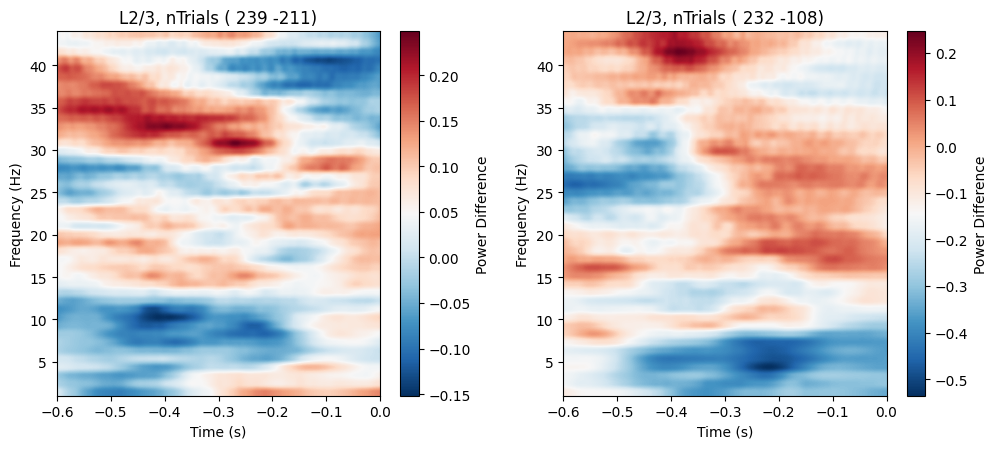

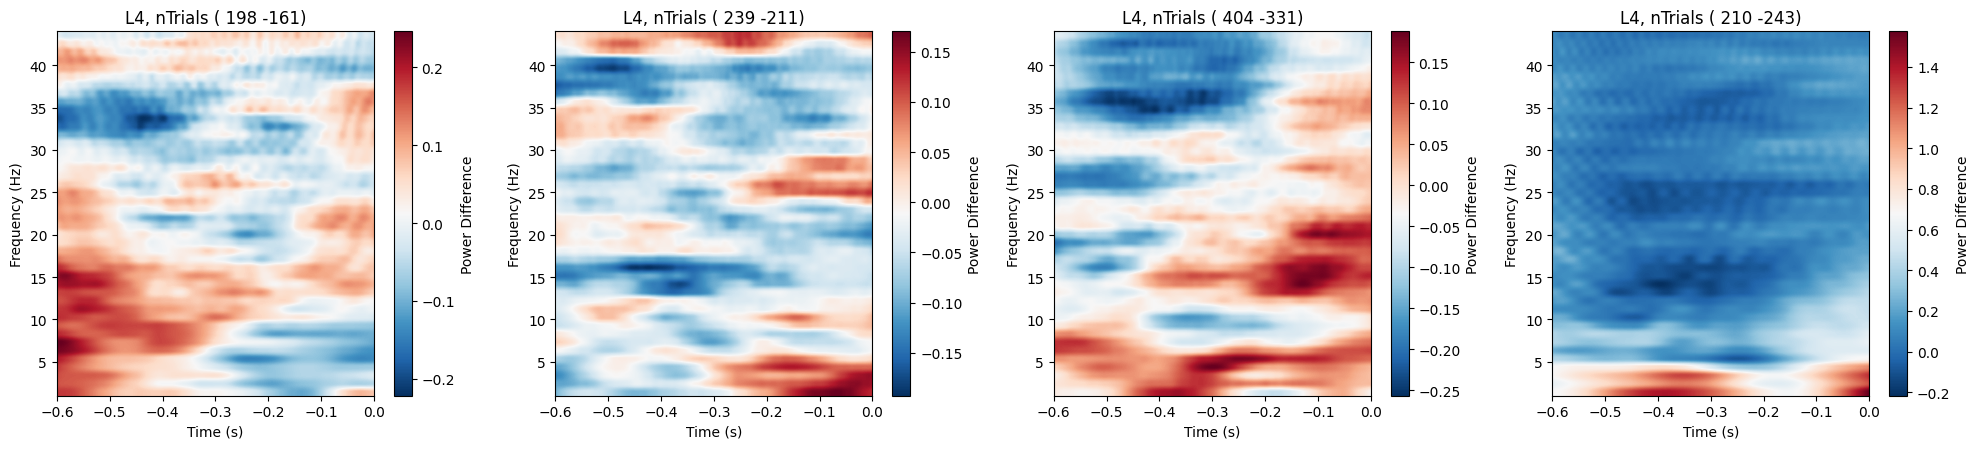

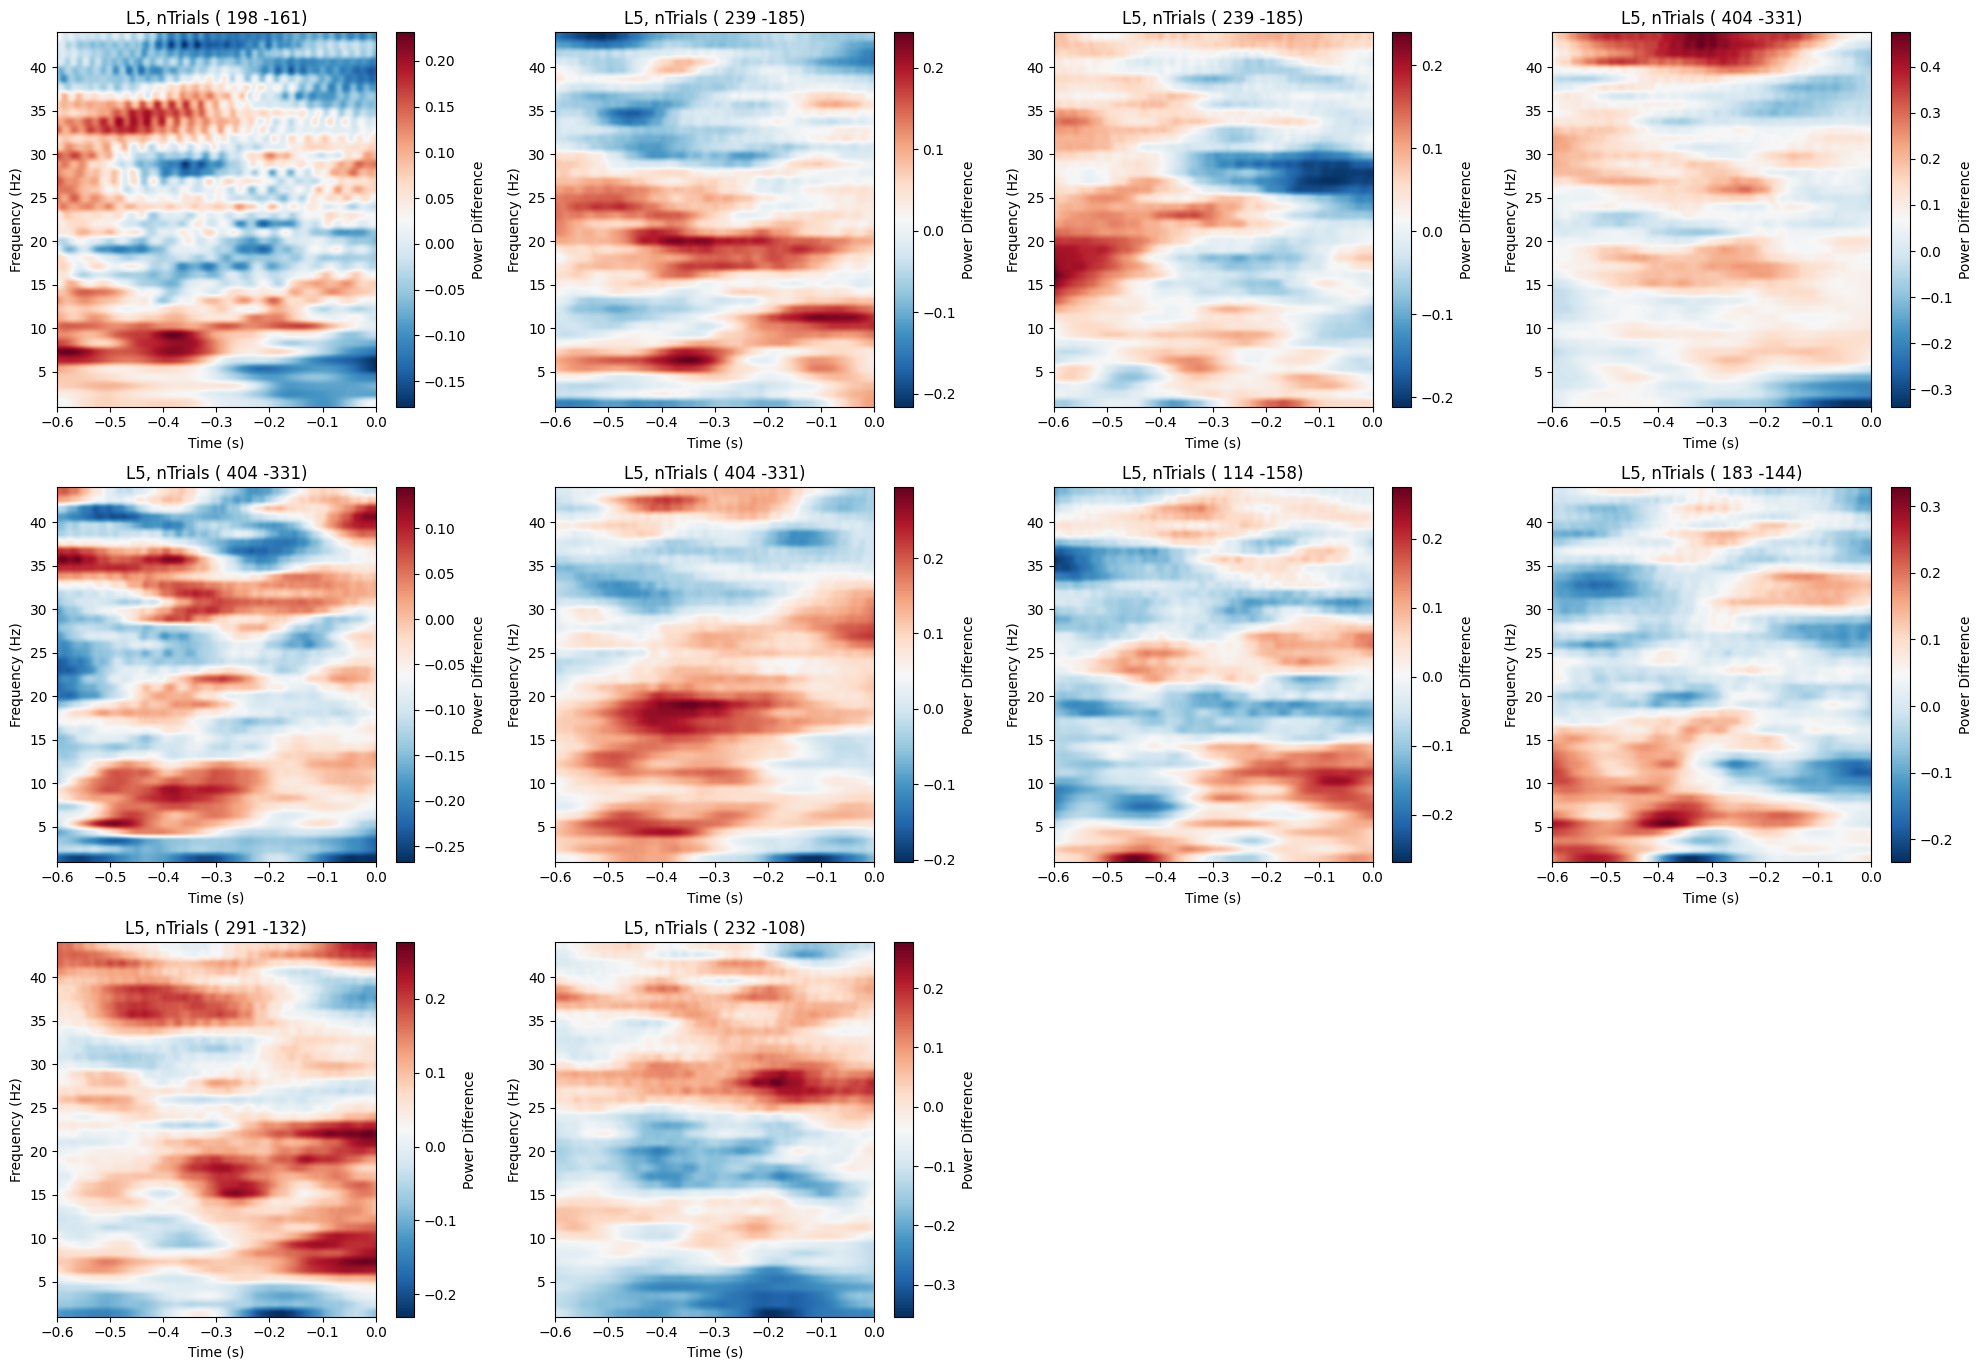

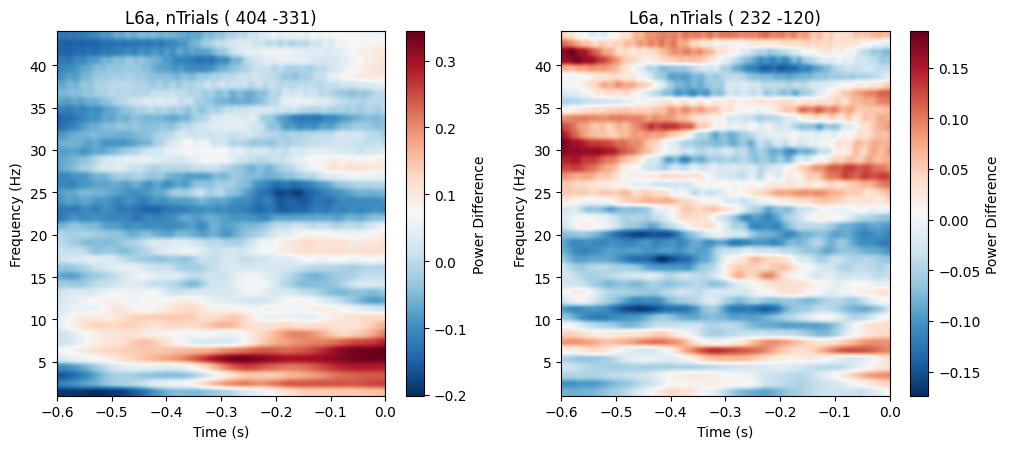

In [7]:
side_selective = 'left'
order = 'Left-Right'
condition = 'BiasRight_BiasLeft_anticip' 
tmin = -0.6
tmax = 0
selectives = pd.concat([right_selective, left_selective])
selectives = selectives[~selectives['ch_indexs'].isin([0, 383])]
pids = np.unique(selectives['pid'].values)
visual_areas = ['VISp', 'VISpm', 'VISam', 'VISa', 'VISrl', 'VISal', 'VISli', 'VISl']
visual_areas = ['VISa']


# in left selective electrodes
#- TFR for left  vs right  during anticiaption of the target in left selective electrodes
BR_TF_all, BL_TF_all, ch_names, times, freqs, BR_n_trials , BL_n_trials = aggregate_TFs(pids, selectives, condition , side_selective  , visual_areas, tmin,  tmax)
diff  = BL_TF_all - BR_TF_all
print(f"total {side_selective} selective electrodes for condition {condition} is {len(ch_names)}")
plot_time_frequency_diff( diff, times, freqs, ch_names, BL_n_trials, BR_n_trials, side_selective , visual_areas, order)

# 2) TFR right 80  - right 20 blocks during anticiaption of the target in right selective electrodes

total right selective electrodes for condition BiasRight_BiasLeft_anticip is 21
Processing region: VISa


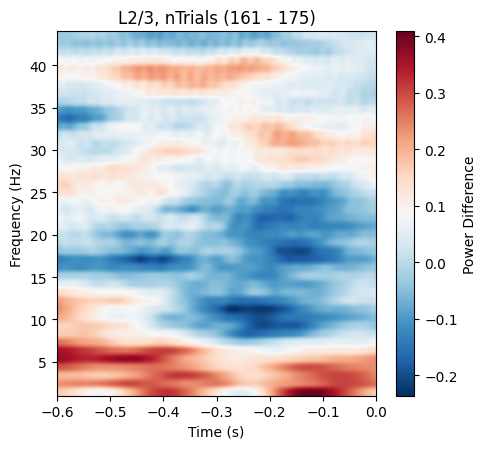

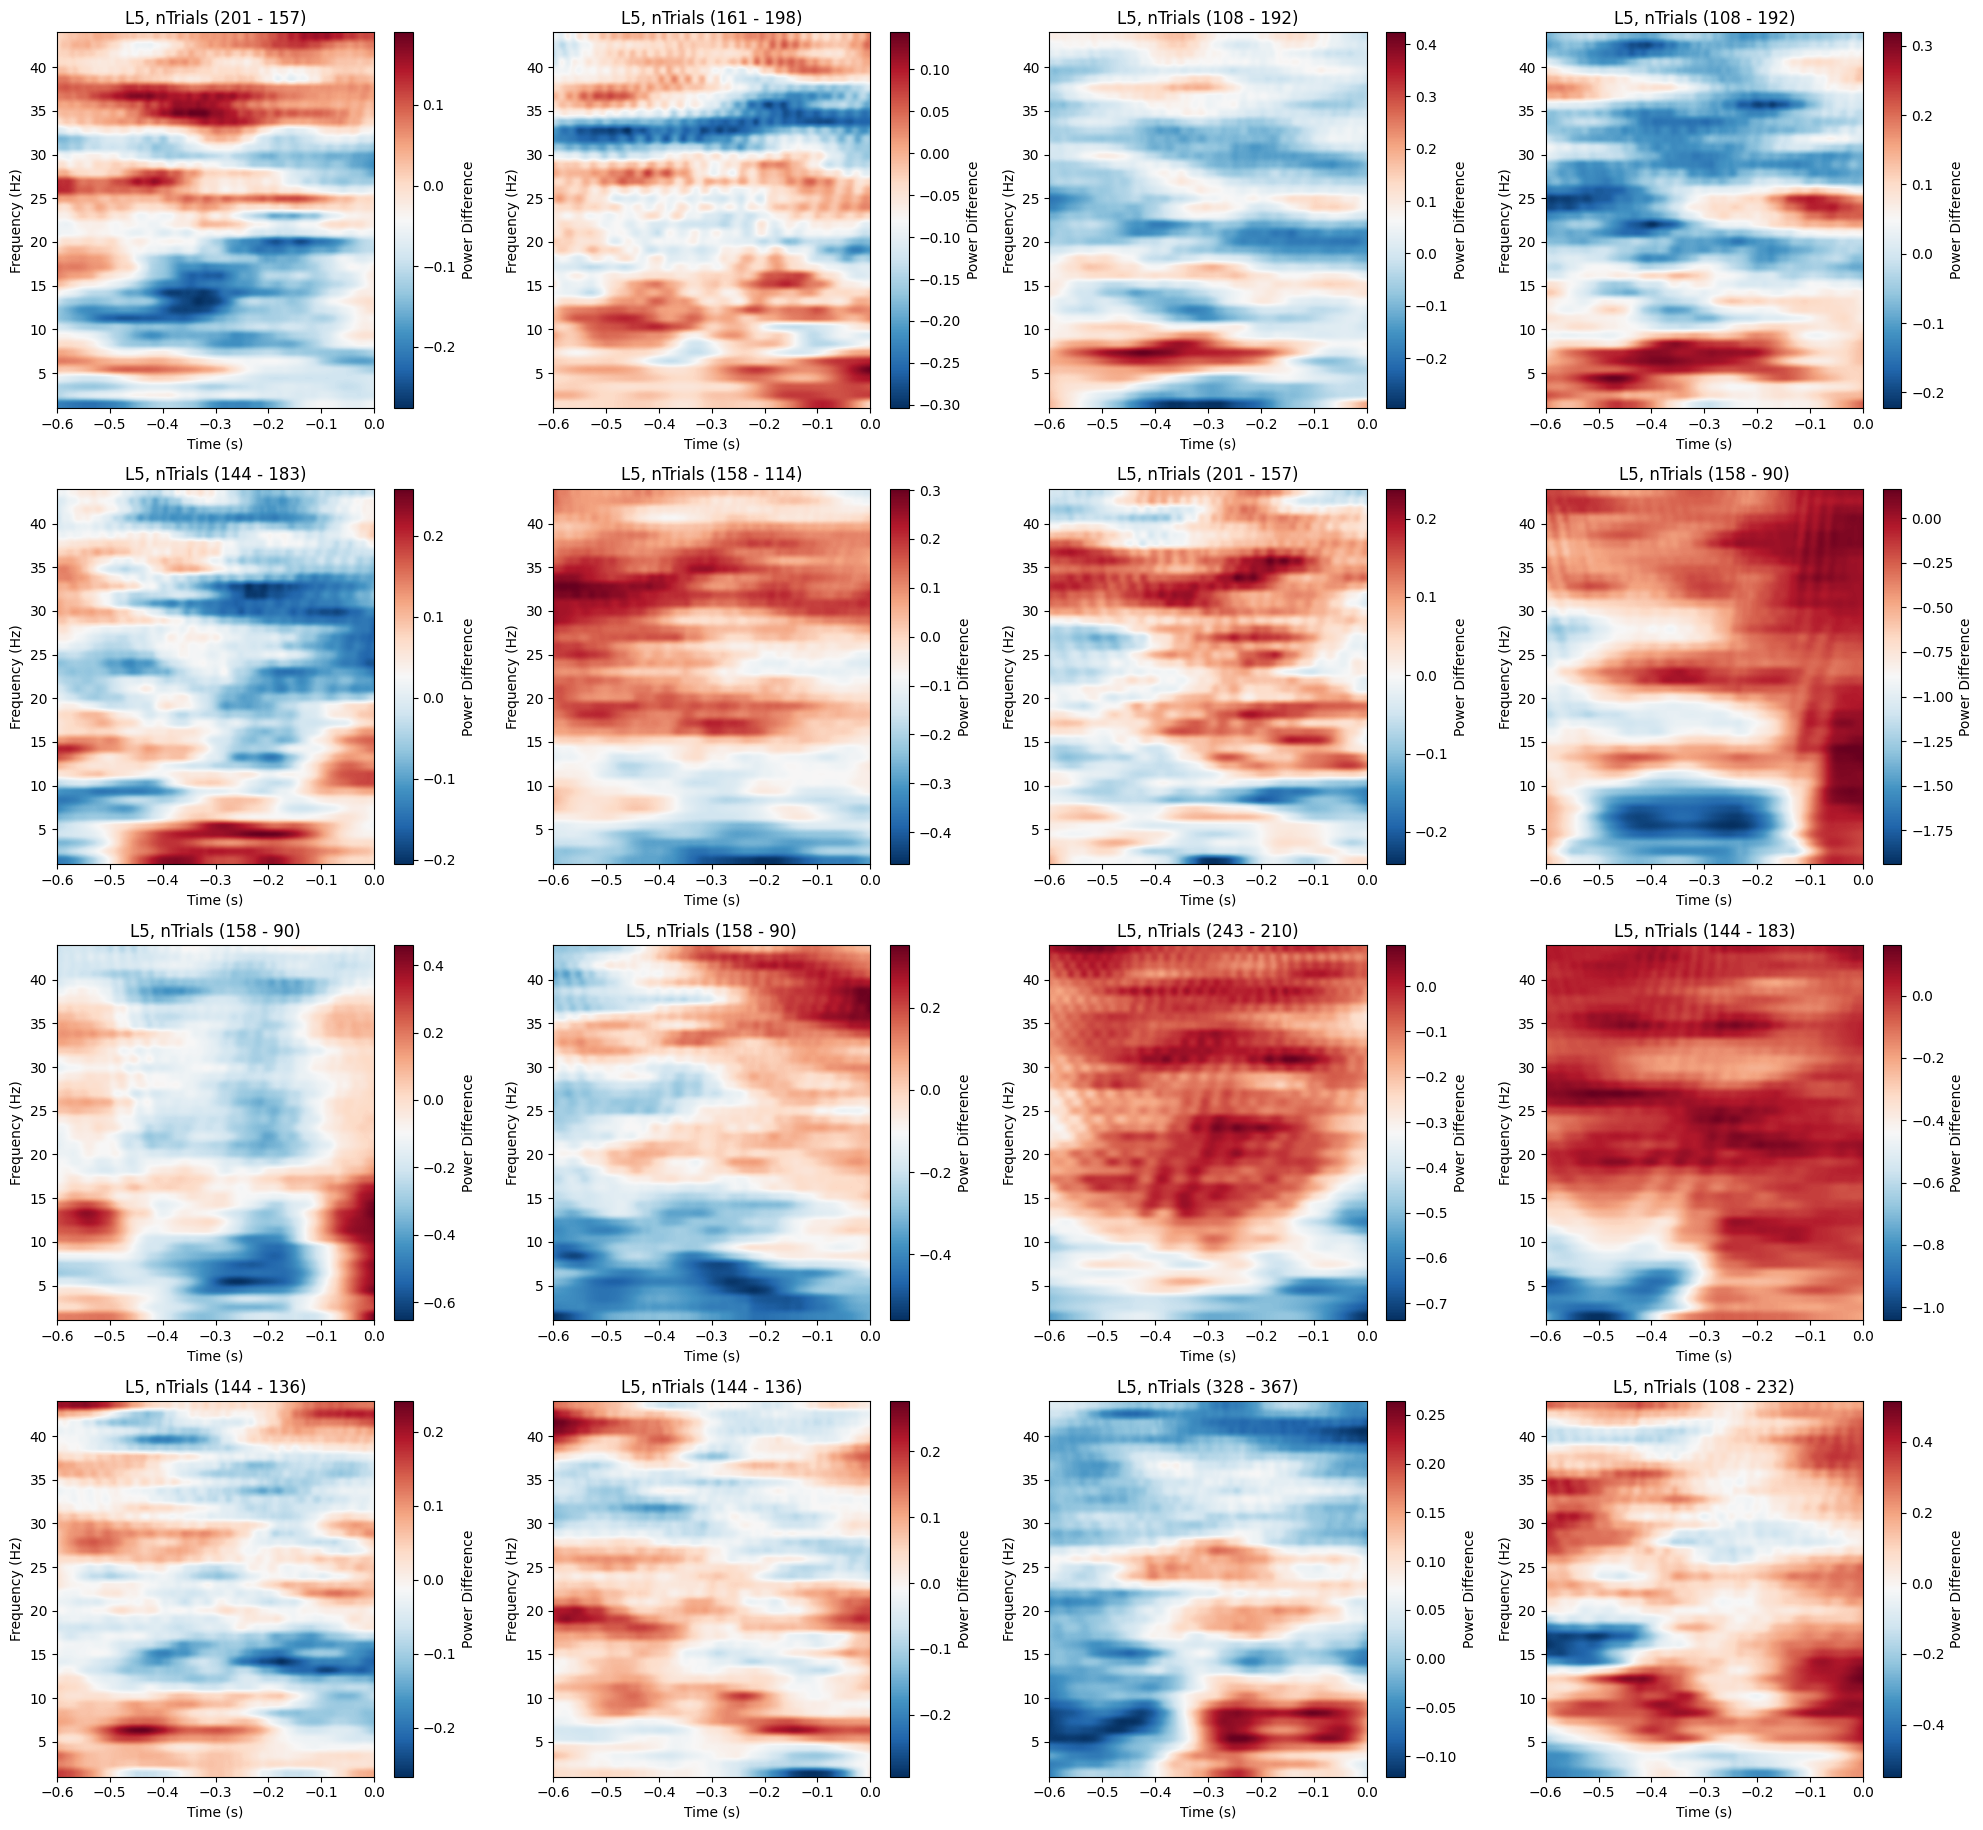

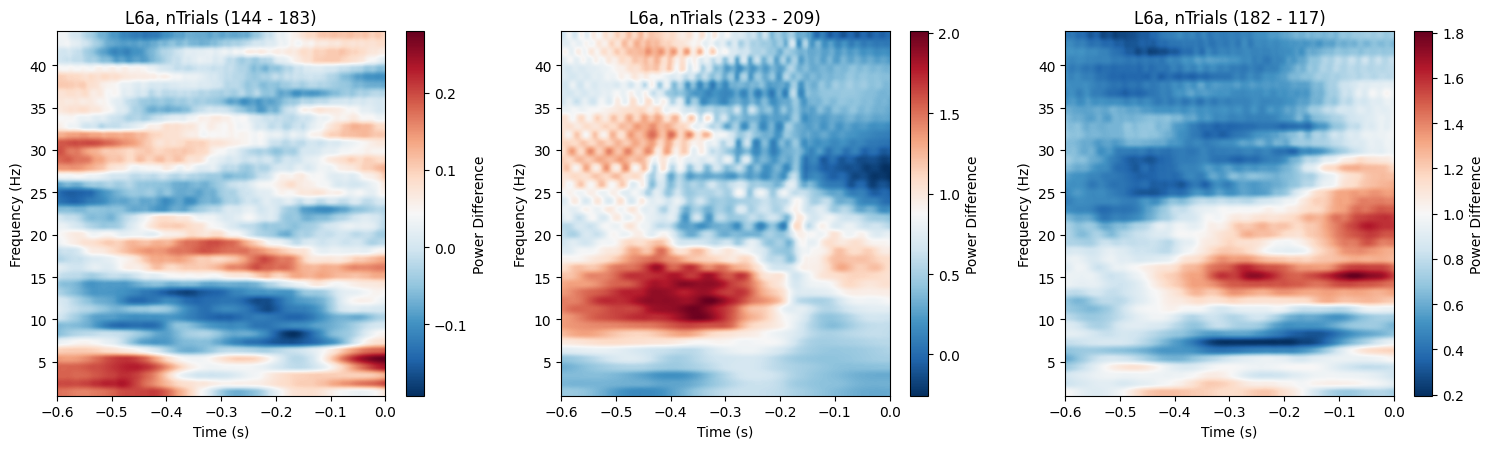

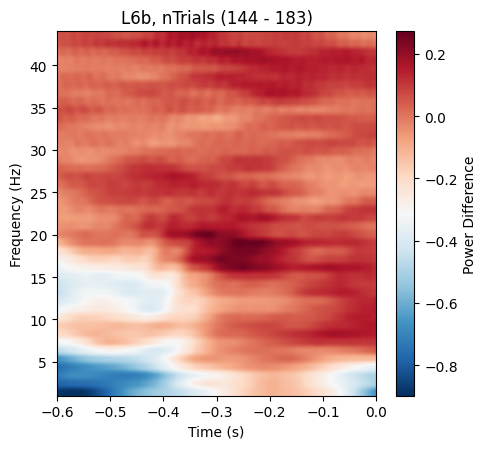

In [8]:
side_selective = 'right'
order = 'Right-Left'
condition = 'BiasRight_BiasLeft_anticip' 
tmin = -0.6
tmax = 0
selectives = pd.concat([right_selective, left_selective])
selectives = selectives[~selectives['ch_indexs'].isin([0, 383])]
pids = np.unique(selectives['pid'].values)
visual_areas = ['VISp', 'VISpm', 'VISam', 'VISa', 'VISrl', 'VISal', 'VISli', 'VISl']
visual_areas = ['VISa']


# in left selective electrodes
#- TFR for left  vs right  during anticiaption of the target in left selective electrodes
BR_TF_all, BL_TF_all, ch_names, times, freqs, BR_n_trials , BL_n_trials = aggregate_TFs(pids, selectives, condition , side_selective  , visual_areas, tmin,  tmax)
diff  = BR_TF_all - BL_TF_all
print(f"total {side_selective} selective electrodes for condition {condition} is {len(ch_names)}")
plot_time_frequency_diff( diff, times, freqs, ch_names, BL_n_trials, BR_n_trials, side_selective , visual_areas, order)
